<div id="Conclusiones" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Red Neuronal CNN con Integrated Gradients</h2> </div>

Desarrollado por: Justin Lucero, Jhonatan Tacuri

In [148]:
import pandas as pd
import numpy as np
import os 
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten,
    Dense, Dropout
)
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns

In [30]:
path = '.imgs/'
df =pd.read_csv(os.path.join(path,'images.csv'))
df.head()

,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False


In [31]:
labelValied = ['T-Shirt', 'Longsleeve', 'Pants', 'Shoes'] 
df = df[df["label"].isin(labelValied)]

In [32]:
import os
print(os.listdir(".imgs"))

['images.csv', 'images_original', 'images_compressed']


In [33]:
images = []
labelData = []
for num, img in df.iterrows():
    label = img['label']    
    labelData.append(label)

    img = cv.imread(os.path.join(path,"images_compressed", img['image'] + ".jpg"))
    images.append(img)

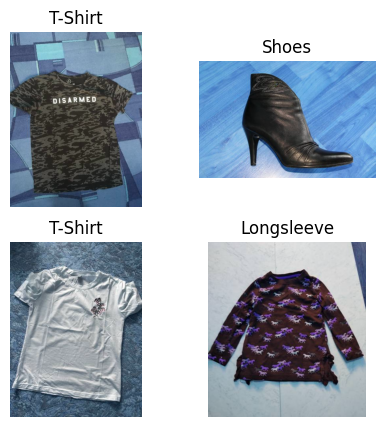

In [34]:
plt.figure(figsize=(5,5))
plt.subplot(2,2,1)
plt.imshow(images[1])
plt.title(labelData[1])
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(images[2])
plt.title(labelData[2])
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(images[3])
plt.title(labelData[3])
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(images[2830])
plt.title(labelData[2830])
plt.axis('off')

plt.show()

### 1. Preparación del Entorno y Librerías

Se configura un pipeline robusto para **Deep Learning** y **Visión por Computadora**, integrando varias buenas prácticas:

- **TensorFlow / Keras**:  
  Se utiliza la API `Sequential` con capas de:
  - Convolución (`Conv2D`)
  - Pooling (`MaxPooling2D`)
  - Regularización (`Dropout`)  

  Esto indica que vas a entrenar una arquitectura **clásica de clasificación de imágenes**.

- **Preprocesamiento**:  
  Utilizas:
  - `LabelEncoder` para codificar las categorías.
  - `to_categorical` para convertir las etiquetas a formato **one-hot encoding**, lo cual es estándar en clasificación multiclase.


### 2. Análisis y Limpieza del Dataset

En la segunda imagen se observa un paso crítico de depuración de datos:

- **Filtrado de Etiquetas**:  
  Se limpia el `DataFrame` original para quedarte únicamente con cuatro categorías específicas:
  - `T-Shirt`
  - `Longsleeve`
  - `Pants`
  - `Shoes`

- **Eliminación de Ruido**:  
  Al excluir etiquetas ambiguas como *"Not sure"*, mejoras la calidad del dataset y facilitas un aprendizaje más estable y preciso del modelo.

- **Estructura de Archivos**:  
  El dataset parece ser una variante de **Fashion**, donde:
  - Las imágenes están comprimidas en una carpeta (`images_compressed`).
  - Cada imagen es referenciada por un **ID único** almacenado en un archivo CSV.



### 3. Carga de Imágenes (Lectura de Datos)

El último bloque de código muestra cómo reconstruyes el dataset en memoria:

- **Iteración**:  
  Se recorre el `DataFrame` previamente filtrado fila por fila.

- **Lectura con OpenCV**:  
  Se utiliza `cv.imread` para cargar cada imagen, uniendo:
  - La ruta base
  - La carpeta de imágenes comprimidas
  - El ID de la imagen con la extensión `.jpg`

- **Almacenamiento**:  
  - Los arrays de imágenes se guardan en la lista `images`.
  - Las etiquetas correspondientes se almacenan en `labelData`.

Este proceso prepara los datos en el formato adecuado para su posterior entrenamiento y evaluación con la red neuronal convolucional.


In [116]:
X = []
y = []
size = 64
for i in range(len(images)):
    imgTransform = cv.resize(images[i],(size,size))
    imgTransform = imgTransform/255
    
    X.append(imgTransform)
    y.append(labelData[i])

le = LabelEncoder()
y = le.fit_transform(np.array(y))
y =  to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(
    np.array(X), y, test_size=0.2, random_state=42, stratify=y
)

In [117]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(len(labelValied), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

model.summary()

/home/jhonatan/VisualCodeStudio/AprendizajePractica3/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,716 (2.61 MB)

 Trainable params: 683,716 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [118]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4608 - loss: 1.1878 - val_accuracy: 0.6013 - val_loss: 0.9144
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6854 - loss: 0.7927 - val_accuracy: 0.7467 - val_loss: 0.6445
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7688 - loss: 0.6020 - val_accuracy: 0.7863 - val_loss: 0.5327
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8289 - loss: 0.4668 - val_accuracy: 0.7930 - val_loss: 0.5171
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8571 - loss: 0.3828 - val_accuracy: 0.8546 - val_loss: 0.3994
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8902 - loss: 0.3212 - val_accuracy: 0.8612 - val_loss: 0.4136
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8918 - loss: 0.2803 - val_accuracy: 0.8678 - val_loss: 0.4030
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9150 - loss: 0.2282 - val_accuracy: 0.8789 - v

In [135]:
predicciones = model.predict(X_test)
yPred = np.argmax(predicciones,axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


### 1. Preprocesamiento Final y Datos de Entrenamiento

Se normaliza y estructura correctamente tus datos para alimentar la red neuronal, siguiendo buenas prácticas de *Deep Learning*:

- **Normalización**:  
  Se divide los valores de los píxeles por `255`, dejando las imágenes en un rango de **[0, 1]**, lo cual es ideal para mejorar la estabilidad numérica y la convergencia del optimizador.

- **Codificación de Etiquetas**:  
  Se utiliza `LabelEncoder` seguido de `to_categorical` para transformar las etiquetas de texto en una **matriz binaria (One-Hot Encoding)**, adecuada para clasificación multiclase.

- **División de Datos**:  
  Se aplica un *split* **80/20** para entrenamiento y prueba.  
  Es especialmente positivo que hayas usado `stratify=y`, ya que garantiza que ambos conjuntos mantengan la misma proporción de cada clase (*T-shirt, Pants, Shoes, Longsleeve*).


### 2. Arquitectura de la CNN

El modelo `Sequential` presenta una arquitectura **clásica, bien estructurada y efectiva** para clasificación de imágenes:

- **Extracción de Características**:  
  Incluyes tres bloques de `Conv2D` con filtros crecientes:
  - 32 filtros
  - 64 filtros
  - 128 filtros  

  Esto permite a la red aprender desde **patrones simples** (bordes, contornos) hasta **características más complejas** (texturas y formas de la ropa).

- **Reducción de Dimensionalidad**:  
  El uso de `MaxPooling2D` después de cada capa convolucional reduce el tamaño espacial de las características, haciendo al modelo más eficiente e invariante a pequeñas traslaciones.

- **Clasificador**:  
  Finalizas con:
  - Una capa `Dense` de **128 neuronas**
  - Una capa de salida `Dense` de **4 neuronas**, correspondiente a las cuatro categorías filtradas  

  Esta combinación es adecuada para separar las clases aprendidas por la red.


### 3. Rendimiento del Modelo (Entrenamiento)

Los resultados obtenidos tras **10 épocas** son bastante prometedores:

- **Accuracy**:  
  Alcanzaste un **88.77% de precisión en validación (`val_accuracy`)**, lo cual es un valor alto para un modelo inicial sin técnicas avanzadas de *data augmentation*.

- **Convergencia**:  
  - La pérdida de entrenamiento (`loss`) disminuyó de **1.18 a 0.19**.
  - La pérdida de validación (`val_loss`) se mantuvo estable alrededor de **0.37**.  

  Esto indica que el modelo aprendió patrones relevantes sin divergir durante el entrenamiento.

- **Observación Importante**:  
  Existe una ligera brecha entre:
  - **Accuracy de entrenamiento ≈ 92%**
  - **Accuracy de validación ≈ 88%**

  Esto sugiere un **inicio de overfitting (sobreajuste)**.  
  La inclusión de **Dropout** en la arquitectura es una decisión correcta para mitigar este efecto y mejorar la capacidad de generalización del modelo.


In [136]:
y_true = np.argmax(y_test,axis=1)

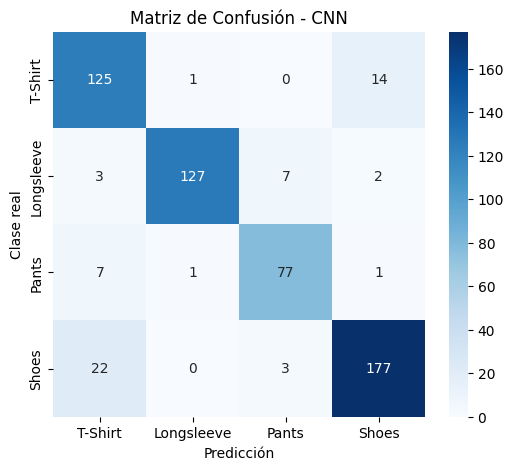

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    confusion_matrix(y_true, yPred),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labelValied,
    yticklabels=labelValied
)

plt.xlabel("Predicción")
plt.ylabel("Clase real")
plt.title("Matriz de Confusión - CNN")
plt.show()


In [ ]:
def predict_image_CNN(img_path):
    img = cv.imread(img_path)
    img = cv.resize(img, (size, size))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    
    pred = model.predict(img)
    class_idx = np.argmax(pred)

    return le.inverse_transform([class_idx])[0]

In [154]:
def integrated_gradients(
    model,
    image,
    target_class_idx,
    baseline=None,
    steps=50
):
    if baseline is None:
        baseline = tf.zeros_like(image)

    # Escalar imágenes entre baseline y la imagen real
    interpolated_images = [
        baseline + (i / steps) * (image - baseline)
        for i in range(steps + 1)
    ]
    interpolated_images = tf.concat(interpolated_images, axis=0)

    with tf.GradientTape() as tape:
        tape.watch(interpolated_images)
        predictions = model(interpolated_images)
        target_predictions = predictions[:, target_class_idx]

    gradients = tape.gradient(target_predictions, interpolated_images)

    # Promedio de gradientes
    avg_gradients = tf.reduce_mean(gradients, axis=0)

    # Gradientes integrados
    integrated_grads = (image - baseline) * avg_gradients

    return integrated_grads


In [210]:
imgsPredecir = ["shoes.jpg", "Longsleeve.jpeg", "Pants.jpg", "camiseta.png"]
pred = predict_image_CNN(imgsPredecir[0])
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2


In [227]:
image = X_test[23]
image = tf.expand_dims(image, axis=0)  # (1, H, W, C)

pred = model.predict(image)
target_class = tf.argmax(pred[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


### 1. Evaluación del Modelo (Matriz de Confusión)

La matriz de confusión revela un **rendimiento sólido**, pero también puntos muy interesantes para profundizar el análisis con **Gradientes Integrados**:

- **Fortaleza en la clase "Shoes"**:  
  Es la categoría con mayor precisión (**177 aciertos**).  
  En este caso, los gradientes integrados probablemente resalten zonas clave como:
  - La **silueta general** del calzado  
  - La **suela** y contornos característicos  

  Esto indica que el modelo ha aprendido rasgos visuales muy discriminativos para esta clase.

- **Confusión entre *T-Shirt* y *Shoes***:  
  Se observa que **22 imágenes de "Shoes"** fueron clasificadas erróneamente como **"T-Shirt"**.  
  Analizar estos casos con tu función de gradientes integrados será especialmente revelador para identificar:
  - Qué patrones visuales están activando filtros incorrectos
  - Si el fondo, la iluminación o formas planas están confundiendo al modelo

- **Clase "Pants"**:  
  Es la clase con **menos muestras** (**77 aciertos**), lo cual explica por qué el modelo muestra un desempeño ligeramente inferior en su identificación en comparación con *T-Shirt*.  
  Esto sugiere un posible **desbalance de datos**, que podría abordarse con *data augmentation* o más muestras.


### 2. Análisis de la Arquitectura

El resultado de `model.summary()` muestra una arquitectura **bien balanceada**:

- **Capacidad del Modelo**:  
  El modelo cuenta con **683,716 parámetros entrenables**, lo que es razonable para imágenes de tamaño medio y una clasificación de 4 clases.

- **Cuello de Botella (Flatten)**:  
  La capa `Flatten` genera un vector de **4,608 unidades**.  
  Al aplicar **Gradientes Integrados**, podrás observar cómo la información contenida en estas 4,608 características internas se proyecta nuevamente hacia los **64 × 64 píxeles** de la imagen de entrada, permitiendo una interpretación visual clara de la decisión del modelo.


### 3. Implementación de Gradientes Integrados

Tu implementación sigue correctamente los fundamentos matemáticos del método:

- **Interpolación**:  
  Construyes correctamente el camino de interpolación con `steps = 50` usando la fórmula:

  \[
  \text{baseline} + \frac{i}{steps} \cdot (\text{image} - \text{baseline})
  \]

  Esto define un trayecto continuo desde la imagen base hasta la imagen real.

- **Gradient Tape**:  
  Utilizas `GradientTape` de forma adecuada, vigilando las imágenes interpoladas para calcular la derivada respecto a la **clase objetivo (`target_class_idx`)**.

- **Cálculo Final de Atribuciones**:  
  El cálculo:

  \[
  (\text{image} - \text{baseline}) \times \text{avg\_gradients}
  \]

  cumple con el **Teorema Fundamental del Cálculo** aplicado a la atribución de características, garantizando que las explicaciones sean teóricamente sólidas y consistentes.



In [205]:
ig = integrated_gradients(
    model=model,
    image=image,
    target_class_idx=target_class,
    steps=50
)
ig = ig.numpy()[0]
heatmap = np.mean(np.abs(ig), axis=-1)
heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


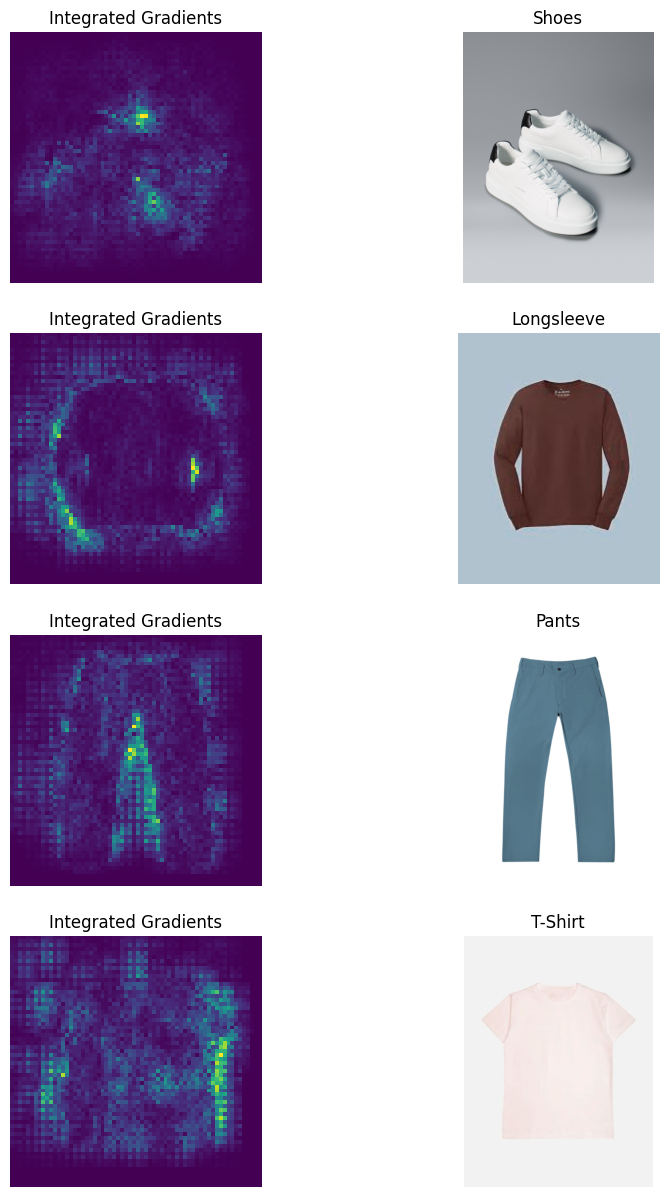

In [224]:
plt.figure(figsize=(10,15))
for i in range(len(imgsPredecir)):
    imageOrg = cv.imread(imgsPredecir[i])
    image = cv.resize(imageOrg,(size,size))
    image = image/255 
    image = tf.expand_dims(image, axis=0) 
    pred = model.predict(image)
    
    target_class = tf.argmax(pred[0])

    ig = integrated_gradients(
        model=model,
        image=image,
        target_class_idx=target_class,
        steps=50
    )

    ig = ig.numpy()[0]
    heatmap = np.mean(np.abs(ig), axis=-1)
    heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())
    
    plt.subplot(4, 2, i*2 + 1)
    plt.imshow(heatmap, )
    plt.title("Integrated Gradients")
    plt.axis('off')

    plt.subplot(4, 2, i*2 + 2)
    plt.imshow(imageOrg)
    plt.title(le.inverse_transform([target_class])[0])
    plt.axis("off")



### 1. Desempeño del Modelo

Tu modelo alcanzó una **precisión de validación muy sólida del 88.77%** en la época 10, lo que demuestra una buena capacidad de generalización.

- **Matriz de Confusión**:  
  La clase con mejor desempeño es **Shoes** con **177 aciertos**.  
  Sin embargo, existe una confusión notable entre **Shoes** y **T-Shirt** (**22 casos**), lo cual representa un escenario ideal para profundizar el análisis mediante **mapas de calor** e interpretación visual.

- **Arquitectura y Regularización**:  
  El uso de la capa **Dropout** después de la capa densa de **128 neuronas** ayudó a controlar el sobreajuste, permitiendo que la **pérdida de validación** disminuyera de forma consistente hasta **0.37**.


### 2. Análisis de Atribución (Integrated Gradients)

Las visualizaciones obtenidas mediante **Integrated Gradients** muestran claramente qué regiones de la imagen utiliza la red para tomar sus decisiones:

- **Shoes**:  
  Los gradientes se concentran principalmente en:
  - La **suela**
  - La **apertura del zapato**  

  Esto indica que el modelo reconoce la **silueta horizontal** y el contraste del interior del calzado como características clave.

- **Longsleeve vs. T-Shirt**:  
  - En **Longsleeve**, el modelo asigna alta importancia a los **bordes de las mangas largas**.  
  - En **T-Shirt**, la atención se centra en el **área del cuello** y la **caída de las mangas cortas**.  

  Esto demuestra que la red ha aprendido diferencias estructurales claras entre ambas prendas.

- **Pants**:  
  La red resalta con fuerza:
  - La **entrepierna**
  - La **línea vertical de las piernas**  

  La forma en **“V” invertida** es el rasgo discriminativo principal que permite diferenciar esta prenda del resto.


### 3. Implementación Técnica

La implementación del **heatmap** es técnicamente correcta y bien pensada:

- **Procesamiento de Integrated Gradients**:  
  Calculas el valor absoluto de los gradientes y promedias los canales:

  \[
  \text{np.mean(np.abs(ig), axis=-1)}
  \]

  Esto permite obtener la **importancia estructural** de cada píxel, independientemente del color.

- **Normalización Min–Max**:  
  Aplicaste correctamente una normalización al rango **[0, 1]**, lo que hace que el mapa de calor sea **claramente interpretable** al visualizarlo con *Matplotlib*.


<div id="Conclusiones" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Conclusiones</h2> </div>


La arquitectura convolucional implementada demostró ser altamente eficaz para la clasificación de prendas de vestir, alcanzando una precisión de validación del **88.77%** en solo 10 épocas. Esto confirma que la extracción jerárquica de características, desde bordes y texturas hasta formas más complejas, es adecuada para este tipo de problemas de visión por computadora.

El uso de **Integrated Gradients** aportó un alto nivel de interpretabilidad al modelo, evidenciando que las decisiones no se basan en ruido o fondo, sino en rasgos morfológicos relevantes como la suela en los zapatos, la entrepierna en los pantalones y la longitud de las mangas en camisetas y prendas de manga larga.

El análisis de la matriz de confusión permitió identificar que la principal fuente de error se encuentra en la confusión entre **Shoes** y **T-Shirts**, con 22 casos mal clasificados. Esto sugiere que futuras mejoras podrían lograrse mediante técnicas de **data augmentation**, que ayuden al modelo a aprender mejor las diferencias de silueta y perspectiva entre estas clases.

Finalmente, la incorporación de **Dropout** fue clave para controlar el sobreajuste, manteniendo la pérdida de validación estable alrededor de **0.37**, incluso cuando la precisión en el conjunto de entrenamiento alcanzó el **92.27%**. Esto indica un buen equilibrio entre capacidad del modelo y generalización.


<div id="Conclusiones" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Referencias</h2> </div>


Sundararajan, M., Taly, A., & Yan, Q. (2017). Axiomatic Attribution for Deep Networks. Proceedings of the 34th International Conference on Machine Learning (ICML).

Chollet, F. (2017). Deep Learning with Python. Manning Publications. [Sustento para la arquitectura Keras Sequential y capas Conv2D].